In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Softmax function
def softmax(x):
    exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [3]:

# Cross-entropy loss function with sigmoid activation
def sigmoid_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-10
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon)
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / len(y_true)

# Cross-entropy loss function with softmax activation
def softmax_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-10
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon)
    return -np.sum(y_true * np.log(y_pred)) / len(y_true)

In [4]:

# Neural network class with sigmoid activation
class SigmoidNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = 0.1

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)  # Sigmoid activation in output layer
        return self.a2

    def backward(self, X, y):
        m = X.shape[0]
        delta2 = self.a2 - y
        dW2 = np.dot(self.a1.T, delta2) / m
        db2 = np.sum(delta2, axis=0, keepdims=True) / m
        delta1 = np.dot(delta2, self.W2.T) * self.a1 * (1 - self.a1)
        dW1 = np.dot(X.T, delta1) / m
        db1 = np.sum(delta1, axis=0, keepdims=True) / m

        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

# Neural network class with softmax activation
class SoftmaxNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = 0.1

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = softmax(self.z2)  # Softmax activation in output layer
        return self.a2

    def backward(self, X, y):
        m = X.shape[0]
        delta2 = self.a2 - y
        dW2 = np.dot(self.a1.T, delta2) / m
        db2 = np.sum(delta2, axis=0, keepdims=True) / m
        delta1 = np.dot(delta2, self.W2.T) * self.a1 * (1 - self.a1)
        dW1 = np.dot(X.T, delta1) / m
        db1 = np.sum(delta1, axis=0, keepdims=True) / m

        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

In [5]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the sigmoid neural network
input_size = X_train.shape[1]
hidden_size = 4
output_size = y_train.shape[1]
sigmoid_nn = SigmoidNeuralNetwork(input_size, hidden_size, output_size)

# Initialize the softmax neural network
softmax_nn = SoftmaxNeuralNetwork(input_size, hidden_size, output_size)

# Training loop for sigmoid model
sigmoid_loss_history = []
for i in range(200):
    sigmoid_nn.forward(X_train)
    sigmoid_nn.backward(X_train, y_train)
    loss = sigmoid_cross_entropy_loss(y_train, sigmoid_nn.forward(X_train))
    sigmoid_loss_history.append(loss)

# Training loop for softmax model
softmax_loss_history = []
for i in range(200):
    softmax_nn.forward(X_train)
    softmax_nn.backward(X_train, y_train)
    loss = softmax_cross_entropy_loss(y_train, softmax_nn.forward(X_train))
    softmax_loss_history.append(loss)

C:\Users\devpr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Test Accuracy (Sigmoid): 0.6333333333333333
Test Accuracy (Softmax): 0.9666666666666667


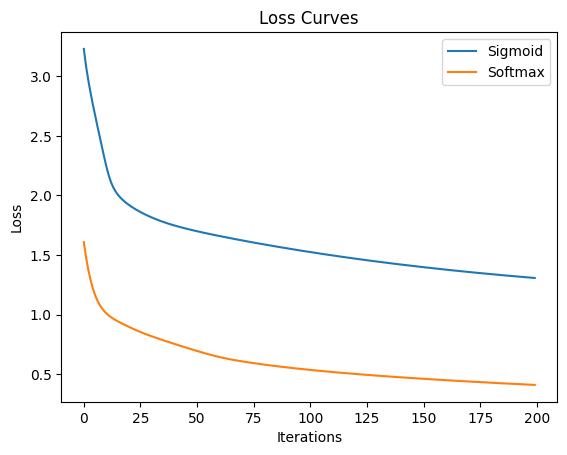

In [6]:
# Predict on the test set using sigmoid model
y_pred_test_sigmoid = sigmoid_nn.predict(X_test)

# Predict on the test set using softmax model
y_pred_test_softmax = softmax_nn.predict(X_test)

# Calculate accuracy for sigmoid model
accuracy_sigmoid = np.mean(y_pred_test_sigmoid == np.argmax(y_test, axis=1))
print("Test Accuracy (Sigmoid):", accuracy_sigmoid)

# Calculate accuracy for softmax model
accuracy_softmax = np.mean(y_pred_test_softmax == np.argmax(y_test, axis=1))
print("Test Accuracy (Softmax):", accuracy_softmax)

# Plot the loss curves
plt.plot(sigmoid_loss_history, label='Sigmoid')
plt.plot(softmax_loss_history, label='Softmax')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()
